<a href="https://colab.research.google.com/github/laiananardi/ML_challenge_wine_quality/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to downloaded file
local = '/content/drive/MyDrive/Machine learning/modulo01/desafio/winequality-red.csv'

# Read the csv with pandas
df = pd.read_csv(local, sep=';')

print('DataFrame')
df

Mounted at /content/drive
DataFrame


fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

### **Data Processing**

In [3]:
print('shape')
df.shape

shape


(1599, 12)

In [4]:
#counting the number of null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# showing the "characteristics" of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#analyzing the "dataset statistics"
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [7]:
#calculating the median
df.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

**Pearson's Correlation**


Pearson's correlation evaluates the linear relationship between two continuous variables

Positive correlation: indicates that the relationship between two variables
happens in the same direction, that is, if one variable increases the other
must also increase and if one decreases the other will also be reduced.



Negative correlation: indicates that the linear relationship between two variables
occurs in opposite directions, that is, if one variable is increased, the other must decrease and if one decrease the other must increase.


Zero correlation: demonstrates that there is no linear indication between the
variables


[font1](https://www.analyticsvidhya.com/blog/2021/03/comparison-of-pearson-and-spearman-correlation-coefficients/#:~:text=Pearson%20correlation%3A%20Pearson%20correlation%20evaluates,relationship%20between%20two%20continuous%20variables.&text=The%20Spearman%20correlation%20coefficient%20is,rather%20than%20the%20raw%20data.)

[font2](https://www.questionpro.com/blog/pt-br/correlacao-de-pearson/)

correlation between all columns:                       fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality            

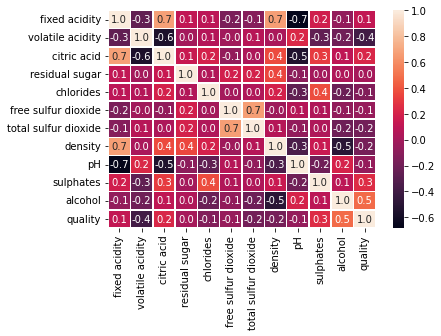

In [8]:
#Pearson's correlation coefficient
import seaborn as sn

# correlation analysis

#correlation between all columns
correlation = df.corr()
print(f'correlation between all columns: {correlation}')


#correlation between two columns
correlationfp = df['fixed acidity'].corr(df['pH'])
print(f'correlation between fixed acidity and pH: {correlationfp}')

correlationqa = df['quality'].corr(df['alcohol'])
print(f'correlation between quality and alcohol: {correlationqa}')


# plot the correlation matrix of all columns

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [9]:
# distinct values ​​of the quality column
distinct = df['quality'].value_counts()
print(distinct)

#instances for quality with value 5
print(df['quality'].value_counts()[5])


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
681


**MinMaxScaler**

(xi -min(x))/(max(x)-min(x))

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

[font](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [10]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#fixed fixed acidity
data = df.iloc[:, :1].values

scaler = MinMaxScaler()
scaler.fit(data)
MinMaxScaler()
print(scaler.data_min_)
print(scaler.data_max_)
print(scaler.transform(data))


[4.6]
[15.9]
[[0.24778761]
 [0.28318584]
 [0.28318584]
 ...
 [0.15044248]
 [0.11504425]
 [0.12389381]]


### **KNN Algorithm (K — Nearest Neighbors)**

It's a supervised algorithm normally used to perform the
classification of instances in a dataset.

The algorithm is based on “how similar” one data (a vector) is to another. The training is formed by vectors of n dimensions.

[font](https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e)

In [11]:
#importing the libraries
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [12]:
# transform data into array
print(df.iloc[:, :-1])
x = df.iloc[:, :-1].values # Input data
# print(x)
print(df.iloc[:,-1:])
y = df.iloc[:,-1:].values  # outputs or target
# print(y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [13]:
# perform data division between training and testing
from sklearn.model_selection import train_test_split   # function that performs dataset division
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30) # 30% for test


**StandardScaler**


Standardize features by removing the mean and scaling to unit variance.

[font]( https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [14]:
# perform the data normalization process
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  #object that normalizes the data
scaler.fit(x_train)  # perform data normalization

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
#train the model
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5) #uses building through 5 neighbors
clf_KNN.fit(x_train, y_train) # apply classification

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [16]:
# perform the forecast
y_pred = clf_KNN.predict(x_test)

In [17]:
#build the confusion matrix to compare the created model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   2   1   0   0]
 [  1   1   8   8   1   0]
 [  2   2 145  50   5   1]
 [  0   0  69 111   9   0]
 [  0   0  11  31  15   0]
 [  0   0   1   4   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.05      0.09        19
           5       0.61      0.71      0.66       205
           6       0.54      0.59      0.56       189
           7       0.47      0.26      0.34        57
           8       0.00      0.00      0.00         7

    accuracy                           0.57       480
   macro avg       0.33      0.27      0.27       480
weighted avg       0.54      0.57      0.55       480



In [18]:
#measure the accuracy
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(acc)

0.5666666666666667


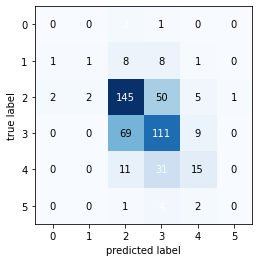

In [19]:
# plot the confusion matrix
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

### Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation

[font](https://scikit-learn.org/stable/modules/tree.html)

In [20]:
from sklearn.tree import DecisionTreeClassifier # import the tree classifier
from sklearn import metrics # import metrics for evaluation


In [21]:
# Creates the classification object 
clf_dt = DecisionTreeClassifier()

# Perform classifier training
clf_dt = clf_dt.fit(x_train,y_train)

# Performs classification prediction
y_pred = clf_dt.predict(x_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        19
           5       0.67      0.71      0.69       205
           6       0.63      0.58      0.60       189
           7       0.47      0.54      0.50        57
           8       0.25      0.14      0.18         7

    accuracy                           0.60       480
   macro avg       0.34      0.33      0.33       480
weighted avg       0.59      0.60      0.59       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


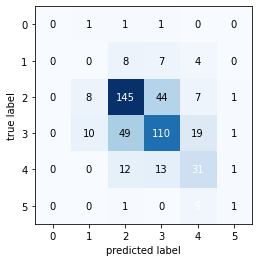

In [22]:
# Evaluating the model


# plot the confusion matrix

matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [23]:
#decision tree view
#import of the libraries needed to perform the decision tree view

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [24]:
#Build the decision tree

dot_data = StringIO()
export_graphviz(clf_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

### Random forest
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems.It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems.

[font](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [26]:
# Creates the classification object 
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

# Perform classifier training
clf_floresta = clf_floresta.fit(x_train,y_train)

# Performs classification prediction
y_pred = clf_floresta.predict(x_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        19
           5       0.73      0.80      0.76       205
           6       0.64      0.75      0.69       189
           7       0.73      0.42      0.53        57
           8       0.00      0.00      0.00         7

    accuracy                           0.69       480
   macro avg       0.35      0.33      0.33       480
weighted avg       0.65      0.69      0.66       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


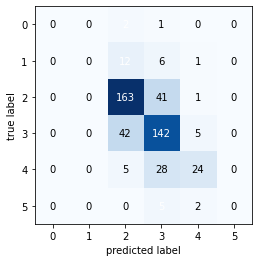

In [27]:
# Evaluating the model

# plot the confusion matrix
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

### Support Vector Machine(SVM) Algorithm


SVM is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

[font](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)


In [28]:
#importing SVM library
from sklearn.svm import SVC

In [29]:
# Creates the classification object 
clf_svm = SVC()   

In [30]:
#Perform the classification
clf_svm.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [31]:
#Perform the prediction
y_pred = clf_svm.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        19
           5       0.67      0.77      0.71       205
           6       0.58      0.67      0.62       189
           7       0.65      0.30      0.41        57
           8       0.00      0.00      0.00         7

    accuracy                           0.63       480
   macro avg       0.32      0.29      0.29       480
weighted avg       0.59      0.63      0.60       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


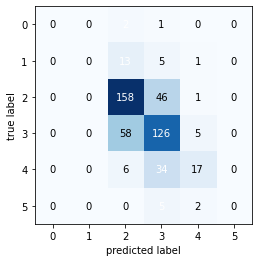

In [32]:
# Evaluating the model

# plot the confusion matrix
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

### MLP Algorithm


MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

[font1](https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/)

[font2](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [33]:
#importing MLP library
from sklearn.neural_network import MLPClassifier

In [34]:
#set network configuration
clf_mlp = MLPClassifier(alpha=1e5, hidden_layer_sizes=(5, 5), random_state=1)

In [35]:
#Perform the model fit
clf_mlp.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=100000.0, hidden_layer_sizes=(5, 5), random_state=1)

In [36]:
#Perform the prediction
y_pred=clf_mlp.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00       205
           6       0.39      1.00      0.57       189
           7       0.00      0.00      0.00        57
           8       0.00      0.00      0.00         7

    accuracy                           0.39       480
   macro avg       0.07      0.17      0.09       480
weighted avg       0.16      0.39      0.22       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


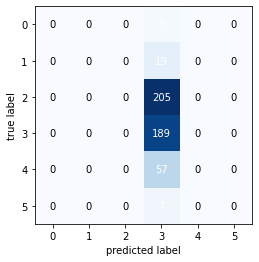

In [37]:
# Evaluating the model

# plot the confusion matrix
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()